In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from cProfile import label
from lib2to3.pytree import HUGE
import random
from numpy import row_stack
import re

In [2]:
dataSet = pd.read_csv('the-hello-dataset-fa22.csv')

In [3]:
# 1. Print the list of students whose first name starts with letter 'H'
print(dataSet[dataSet['Name'].str.startswith('H')])

                    Name  Gender  HSSC-1  HSSC-2  CGPA FavoriteColor  \
9           Hamza Naveed    Male     NaN     459  2.80          Blue   
21           Habib Ullah    Male   399.0     434  3.35       Mustard   
22          Hunain Javed    Male   362.0     413  2.94         Black   
57  Hafiz Malahim Labib.    Male   390.0     430  3.24        Orange   
59   Hamna Tariq Saleemi  Female   400.0     418  2.80         Black   
76                  Hina  Female   410.0     350  2.90          Blue   
77      Hamza Javed Khan    Male   400.0     381  3.39          Blue   
79        Husnain Ahmed     Male   335.0     427  2.41     Dark blue   
92      Hamayoun Masroor    Male     NaN     856  3.16          Pink   
97         Hussain Afzal    Male   415.0     346  2.87          Blue   

    BirthMonth  Weight  
9          May    58.0  
21       April    60.0  
22  September     76.0  
57         May    54.0  
59     October    62.0  
76      August    67.0  
77    January     78.0  
79   Se

In [4]:
# 2. Print the total number of students who have a three words name (first-middle-surname).
name = dataSet['Name']
print("Total Number of Students= ", name.str.contains('\w+\s\w+\s\w').sum())

Total Number of Students=  43


In [5]:
# 3. Print the percentage of students who have a CGPA of 3.0 or above.
cgpa = dataSet[dataSet['CGPA'] >= 3.0].count() / dataSet.count() * 100
print("Percentage of Students having CGPA >= 3.0  ", cgpa['CGPA'].round(0), "%")

Percentage of Students having CGPA >= 3.0   29.0 %


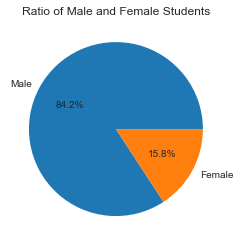

In [6]:
# 4. Plot a pie chart to show the ratio of male and female students.
male = dataSet['Gender'].str.startswith('M').sum()
female = dataSet['Gender'].str.startswith('F').sum()
gender = ["Male", "Female"]
data = [male, female]
plt.style.use('seaborn-whitegrid')
plt.pie(data, labels=gender, autopct='%1.1f%%')
plt.title("Ratio of Male and Female Students")
plt.show()

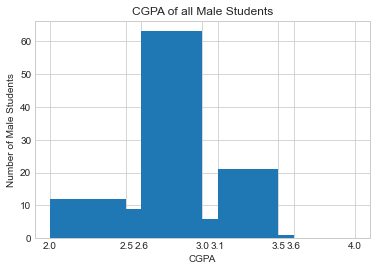

In [7]:
# 5. Plot the CGPA of all male students on a histogram with intervals 2.0-2.5, 2.6-3.0, 3.1-3.5, 3.6-4.0.
list = dataSet[dataSet['Gender'].str.startswith('M')]
maleList = list['CGPA'].tolist()
intervals = [2.0, 2.5, 2.6, 3.0, 3.1, 3.5, 3.6, 4.0]
plt.hist(maleList, bins=intervals)
plt.title("CGPA of all Male Students")
plt.xlabel("CGPA")
plt.ylabel("Number of Male Students")
plt.xticks(intervals)
plt.show()

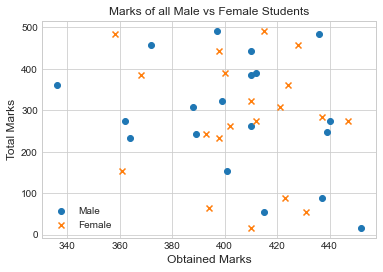

In [8]:
# 6. Plot the HSSC-1 marks of all male vs female students on a scatter plot.
randomlist = random.sample(range(0, 500), 21)
maleMarks = dataSet[dataSet['Gender'].str.startswith('M')]["HSSC-1"].tolist()
femaleMarks = dataSet[dataSet['Gender'].str.startswith('F')]["HSSC-1"].tolist()
maleMarks = maleMarks[:len(femaleMarks)]
plt.scatter(maleMarks, randomlist, marker='o', label="Male")
plt.scatter(femaleMarks, randomlist, marker='x', label="Female")
plt.xlabel('Obtained Marks', fontsize=12)
plt.ylabel('Total Marks', fontsize=12)
plt.title("Marks of all Male vs Female Students")
plt.legend()
plt.show()

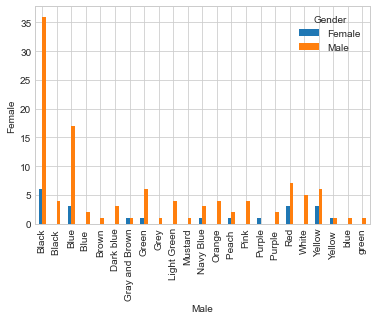

In [9]:
# 7. Plot the favorite colors of male vs female students on a bar chart.
maleFavoriteColor = dataSet[dataSet['Gender'].str.startswith('M')]["FavoriteColor"].count()
femaleFavoriteColor = dataSet[dataSet['Gender'].str.startswith('F')]["FavoriteColor"].count()
favoriteColor = dataSet.groupby(["FavoriteColor", "Gender"]).size().unstack(level=1).plot(kind='bar')
plt.xlabel("Male")
plt.ylabel("Female")
plt.show()

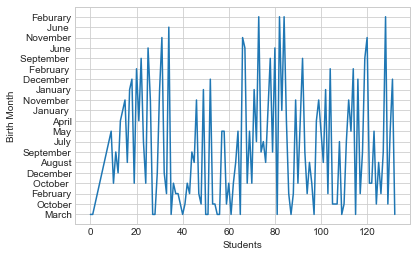

In [10]:
# 8. Plot line chart of students and their birth months.
birthMonth = dataSet["BirthMonth"].tolist()
plt.plot(birthMonth, '-', label='birthMonth')
plt.xlabel("Students")
plt.ylabel("Birth Month")
plt.show()

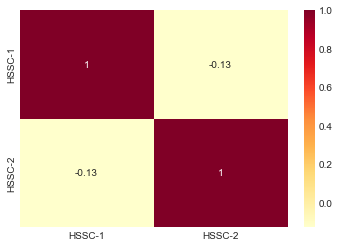

In [12]:
# 9. Create a correlation matrix between HSSC-1 and HSSC-2 marks and then plot on a heatmap.
marks = sb.heatmap(dataSet[["HSSC-1", "HSSC-2"]].corr(), cmap='YlOrRd', annot=True)
plt.show()

# **Insights from the DataSet:**
The insight we get from the data set is that from the dataset we come to know that the strength of Males(84.2%) are More than Females(15.8%). From the data set we can assess the grades of the students like if a student is good performer in HSSC level than there is a bright chance that he will score well in university. From the data we can also assess what color is more liked by the students. From the data we can also get the average weight of the students. From the data we can get the average marks of the students and average CGPA of the students.
